# Example – identifying poisonous mushrooms with rule learners

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Step 1 – collecting data

In [2]:
df = pd.read_csv('10 mushrooms.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
type                        8124 non-null object
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number

# Step 2 – exploring and preparing the data

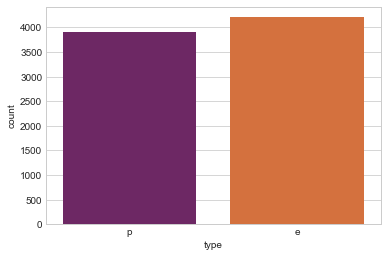

In [3]:
#Quick look at the distribution of the mushroom type class variable in our dataset:
sns.countplot('type',data=df,palette='inferno')

In [4]:
df.describe()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
cat_feats = ['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing','gill_size',
             'gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
             'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type',
             'spore_print_color','population','habitat']
df = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [7]:
#Data preparation – creating random training and test datasets
df['type_flag'] = df['type'].apply(lambda x: 1 if x == 'p' else 0)
x = df.drop(['type_flag','type'],axis=1)
y = df['type_flag']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=123)

# Step 3 – training a model on the data

In [14]:
dtree = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 16)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Step 4 – evaluating model performance

In [15]:
y_pred = dtree.predict(x_test)

print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('classification_report')
print(classification_report(y_test,y_pred))

confusion_matrix
[[427   0]
 [  1 385]]


classification_report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       427
          1       1.00      1.00      1.00       386

avg / total       1.00      1.00      1.00       813

